# **Proyecto Bootcamp:**

## **ANÁLISIS EXPLORATORIO DE TRANSICIÓN ENERGÉTICA EN SURAMÉRICA**

### **INTEGRANTES DEL EQUIPO:**

Lennis Higuita

Teresita Vallejo

Yuri Marcela Dávila

Daniel Felipe Arias

## **CONTENIDO**

Introducción

1. OBJETIVO
2. ALCANCE
3. METODOLOGÍA
4. ANÁLISIS DE DATOS
5. CONCLUSIONES
6. FUENTES


## **INTRODUCCION**
El proyecto busca hacer una análisis exploratorio para conocer sobre el estado de la transición energética en Colombia comparando  países de Suramérica en consumo y producción de energía (tanto fósil como renovable), consumo de energía vs PIB. El objetivo es identificar tendencias y patrones regionales, utilizando datos de "Our World in Data" .

## **OBJETIVO**
Determinar el grado de dependencia de los países latinoamericanos de las energías fósiles y sus impactos económicos, en contraste con el consumo de energías limpias en los últimos 20 años. Esto permitirá comprender el impacto de la transición energética en diferentes países y los factores que influyen en su progreso.


# **ALCANCE**

Se busca segmentar la información en los paises de latinoamérica para mostrar datos relevantes comparativos de diversificación de energías, impatos económicos  y ambientales de producción, demanda de energías y GEI.

## **METODOLOGÍA**

 Manejo de librerias como Numpy, pandas, Matplotlib.

 Manipulación de DataFrames

 Extracción de Datos. Segmentación y filtrado de datos.

 Visualización de Datos. Mediante Matplotlib y Seaborn generando  gráficos comparativos, de participación de variables y mapas.

# #**ANÁLISIS Y LIMPIEZA DE DATOS**

Iniciamos importando
 las bibliotecas pandas, numpy, seaborn y matplotlib.pyplot para cargar la base de datos, realizar su limpieza y llevar a cabo el análisis mediante gráficos


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib.ticker import StrMethodFormatter

Cargamos la base de datos a nuestro entorno de ejecución desde un reposotorio de Github.

Inspeccionamos el conjunto de datos para comprender su estructura y determinar las transformaciones necesarias para su limpieza y normalización.

In [ ]:
url = 'https://github.com/marceladato/Trabajo_Analisis_Datos/raw/refs/heads/main/owid-energy-data.csv'
df = pd.read_csv(url)
df.set_index('year', inplace=True)
df

,country,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
year,,,,,,,,,,,,,,,,,,,,,
2000,ASEAN (Ember),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.87,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2001,ASEAN (Ember),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.46,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2002,ASEAN (Ember),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.62,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2003,ASEAN (Ember),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.45,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2004,ASEAN (Ember),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.40,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,Zimbabwe,ZWE,15354606.0,2.514642e+10,NaN,NaN,NaN,NaN,12.374,0.19,...,0.353,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
2020,Zimbabwe,ZWE,15669663.0,2.317871e+10,NaN,NaN,NaN,NaN,6.382,0.10,...,0.298,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
2021,Zimbabwe,ZWE,15993525.0,2.514009e+10,NaN,NaN,NaN,NaN,0.000,0.00,...,0.236,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


Verificamos que el conjunto de datos es de tipo DataFrame por lo que no hay necesidad de convertirlo a DataFrame.

In [ ]:
type(df)

pandas.core.frame.DataFrame

Revisamos qué columas tiene nuestro dataset.

Creamos una series con el nombre de los paises objeto de estudio para así delimitar nuestro dataframe.

Seleccionados del conjunto de datos original las columnas que contienen los datos que vamos a analizar creando así un nuevo dataframe

In [ ]:
df = df[['country','population','gdp','energy_per_gdp','electricity_demand','electricity_generation','primary_energy_consumption','net_elec_imports','carbon_intensity_elec','greenhouse_gas_emissions','energy_per_capita',
         'gas_electricity','oil_electricity','coal_electricity','fossil_electricity','wind_electricity','solar_electricity','hydro_electricity','biofuel_electricity','other_renewable_electricity','renewables_electricity',
         'gas_consumption','oil_consumption','coal_consumption','fossil_fuel_consumption','wind_consumption','solar_consumption','hydro_consumption','biofuel_consumption','other_renewable_consumption','renewables_consumption']]

lista=['Uruguay','Colombia','Argentina','Bolivia','Paraguay','Brazil', 'Chile', 'Venezuela', 'Peru', 'Ecuador','Guyana','Suriname','Trinidad and Tobago']
df = df[df['country'].isin(lista) & df.index.to_series().between(2000,2023)]
df.head(10)

,country,population,gdp,energy_per_gdp,electricity_demand,electricity_generation,primary_energy_consumption,net_elec_imports,carbon_intensity_elec,greenhouse_gas_emissions,...,gas_consumption,oil_consumption,coal_consumption,fossil_fuel_consumption,wind_consumption,solar_consumption,hydro_consumption,biofuel_consumption,other_renewable_consumption,renewables_consumption
year,,,,,,,,,,,,,,,,,,,,,
2000,Argentina,37070772.0,5.364810e+11,1.303,90.20,88.98,698.777,1.22,355.473,31.63,...,322.967,264.938,7.513,595.418,0.103,0.0,84.497,NaN,1.232,85.832
2001,Argentina,37480492.0,5.148673e+11,1.326,91.89,90.14,682.524,1.75,302.086,27.23,...,302.350,245.349,6.157,553.856,0.145,0.0,107.465,NaN,1.159,108.769
2002,Argentina,37885024.0,4.605585e+11,1.421,90.51,84.59,654.474,5.92,294.834,24.94,...,294.376,232.869,4.586,531.831,0.214,0.0,104.433,NaN,1.692,106.339
2003,Argentina,38278164.0,5.031041e+11,1.394,97.10,92.07,701.506,5.03,316.390,29.13,...,336.290,237.502,5.594,579.387,0.226,0.0,98.026,NaN,2.811,101.063
2004,Argentina,38668796.0,5.503063e+11,1.353,103.73,100.26,744.817,3.47,357.670,35.86,...,368.091,254.686,9.520,632.297,0.209,0.0,87.782,NaN,2.769,90.760
2005,Argentina,39070504.0,6.010504e+11,1.315,109.63,105.75,790.507,3.88,357.163,37.77,...,392.890,266.664,10.962,670.516,0.205,0.0,97.975,NaN,2.926,101.106
2006,Argentina,39476856.0,6.522968e+11,1.273,115.79,113.43,830.543,2.36,349.907,39.69,...,406.505,281.325,9.924,697.754,0.198,0.0,108.169,NaN,3.340,111.707
2007,Argentina,39876116.0,7.147252e+11,1.211,121.12,113.52,865.645,7.60,388.037,44.05,...,427.122,312.609,14.360,754.091,0.174,0.0,88.279,NaN,3.418,91.872
2008,Argentina,40273768.0,7.471574e+11,1.174,127.39,121.91,877.178,5.48,400.623,48.84,...,431.887,316.196,17.516,765.599,0.118,0.0,87.673,NaN,3.850,91.641


A continuación vamos a identificar los nombres de todas las columnas y el tamaño del DataFrame.

Después de filtrar el DataFrame se observa que el conjunto de datos pasa de tener 21812 filas x 129 columnas a 311 filas x 31 columnas.

In [ ]:
df.columns

Index(['country', 'population', 'gdp', 'energy_per_gdp', 'electricity_demand',
       'electricity_generation', 'primary_energy_consumption',
       'net_elec_imports', 'carbon_intensity_elec', 'greenhouse_gas_emissions',
       'energy_per_capita', 'gas_electricity', 'oil_electricity',
       'coal_electricity', 'fossil_electricity', 'wind_electricity',
       'solar_electricity', 'hydro_electricity', 'biofuel_electricity',
       'other_renewable_electricity', 'renewables_electricity',
       'gas_consumption', 'oil_consumption', 'coal_consumption',
       'fossil_fuel_consumption', 'wind_consumption', 'solar_consumption',
       'hydro_consumption', 'biofuel_consumption',
       'other_renewable_consumption', 'renewables_consumption'],
      dtype='object')

In [ ]:
df.shape

(311, 31)

Vamos a visualizar a continuación, un resumen de la información contenida en el cojunto de datos, incluida el número de valores no nulos y el tipo de datos para cada columna.

El único valor tipo object es para 'country', los demás son tipo float. Por lo tanto, no se tendrán que convertir a valor numérico las variables requeridas para hacer el análisis posterior.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, 2000 to 2023
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      311 non-null    object 
 1   population                   311 non-null    float64
 2   gdp                          253 non-null    float64
 3   energy_per_gdp               250 non-null    float64
 4   electricity_demand           308 non-null    float64
 5   electricity_generation       310 non-null    float64
 6   primary_energy_consumption   302 non-null    float64
 7   net_elec_imports             308 non-null    float64
 8   carbon_intensity_elec        308 non-null    float64
 9   greenhouse_gas_emissions     308 non-null    float64
 10  energy_per_capita            302 non-null    float64
 11  gas_electricity              308 non-null    float64
 12  oil_electricity              308 non-null    float64
 13  coal_electricity     

Vamos a calcular primero, el porcentaje de valores faltantes para cada columna, luego la suma de valores Nulos y No Nulos para cada columna del conjunto de datos.

In [ ]:
for col in df.columns:
  porcentaje_faltantes = (np.mean(df[col].isnull()))*100
  print(f'{col} - {porcentaje_faltantes:.2f}%')

country - 0.00%
population - 0.00%
gdp - 18.65%
energy_per_gdp - 19.61%
electricity_demand - 0.96%
electricity_generation - 0.32%
primary_energy_consumption - 2.89%
net_elec_imports - 0.96%
carbon_intensity_elec - 0.96%
greenhouse_gas_emissions - 0.96%
energy_per_capita - 2.89%
gas_electricity - 0.96%
oil_electricity - 0.96%
coal_electricity - 0.96%
fossil_electricity - 0.96%
wind_electricity - 0.32%
solar_electricity - 0.32%
hydro_electricity - 0.32%
biofuel_electricity - 8.68%
other_renewable_electricity - 0.32%
renewables_electricity - 0.32%
gas_consumption - 38.26%
oil_consumption - 38.26%
coal_consumption - 38.26%
fossil_fuel_consumption - 38.26%
wind_consumption - 38.26%
solar_consumption - 42.12%
hydro_consumption - 41.48%
biofuel_consumption - 67.85%
other_renewable_consumption - 38.26%
renewables_consumption - 41.48%


In [ ]:
df.isnull().sum()

,0
country,0
population,0
gdp,58
energy_per_gdp,61
electricity_demand,3
electricity_generation,1
primary_energy_consumption,9
net_elec_imports,3
carbon_intensity_elec,3
greenhouse_gas_emissions,3


In [ ]:
df.notnull().sum()

,0
country,311
population,311
gdp,253
energy_per_gdp,250
electricity_demand,308
electricity_generation,310
primary_energy_consumption,302
net_elec_imports,308
carbon_intensity_elec,308
greenhouse_gas_emissions,308


Al analizar lo anterior, se puede evidenciar que para las variables que contienen información sobre el consumo de energías renevables y No renovables falta casi el 50% de los datos, por lo que vamos a analizar la información faltante para cada país y ver el panorama detallado.

In [ ]:
for pais in (lista):
    nulos = df[df['country'] == pais].isnull().sum()
    print(f" El país {pais} tiene los siguientes valores nulos para las características a evaluar: \n{90*'-'}\n{nulos}")
    print(90*'=')

 El país Uruguay tiene los siguientes valores nulos para las características a evaluar: 
------------------------------------------------------------------------------------------
country                         0
population                      0
gdp                             1
energy_per_gdp                  2
electricity_demand              0
electricity_generation          0
primary_energy_consumption      2
net_elec_imports                0
carbon_intensity_elec           0
greenhouse_gas_emissions        0
energy_per_capita               2
gas_electricity                 0
oil_electricity                 0
coal_electricity                0
fossil_electricity              0
wind_electricity                0
solar_electricity               0
hydro_electricity               0
biofuel_electricity             0
other_renewable_electricity     0
renewables_electricity          0
gas_consumption                24
oil_consumption                24
coal_consumption               24
foss

Vamos a imputar los valores Nulos en las columnas numéricas del DataFrame para cada país en la lista, utilizando los valores disponibles antes y después de los datos faltantes. si toda la columna tiene valores NaN, se va a rellenar con 0

In [ ]:
for pais in (lista):
    paises = df['country'] == pais
    num_cols = df.select_dtypes(include=['number']).columns

    # Rellenar valores extremos con forward fill y backward fill
    df.loc[paises, num_cols] = df.loc[paises, num_cols].ffill()
    df.loc[paises, num_cols] = df.loc[paises, num_cols].bfill()

    # Rellenar con 0 las columnas que aún sean completamente NaN
    df.loc[paises, num_cols] = df.loc[paises, num_cols].fillna(0)

Verificamos que ya no hayan valores nulos.

In [ ]:
df.isnull().sum()

,0
country,0
population,0
gdp,0
energy_per_gdp,0
electricity_demand,0
electricity_generation,0
primary_energy_consumption,0
net_elec_imports,0
carbon_intensity_elec,0
greenhouse_gas_emissions,0


Ahora vamos a renombrar el nombre de las variables a trabajar en español, especificando su unidad de medida para mejor comprensión del DataFrame.

In [ ]:
df.columns=['Pais', 'Poblacion[personas]', 'PIB[$]', 'Consumo_energ_prim_por_PIB[kwh/$]', 'Demanda_elec[Twh]','Generacion_elec[Twh]','Consumo_energ[Twh]','Importaciones_netas_elec[Twh]','Intensidad_carbono_elec [grCO2eq/Kwh]','Emisiones_GEI [MTCO2eq]','Energía_per_capita[kwh/persona]',
         'Generacion_elec_gas[Twh]','Generacion_elec_petr[Twh]','Generacion_elec_carb[Twh]','Generacion_elec_fosil[Twh]','Generacion_elec_eolic[Twh]','Generacion_elec_solar[Twh]','Generacion_elec_hidro[Twh]','Generacion_elec_biocomb[Twh]','Generacion_elec_otras_renov[Twh]','Generacion_elec_renov[Twh]',
         'Consumo_energ_gas[Twh]','Consumo_energ_petr[Twh]','Consumo_energ_carb[Twh]','Consumo_energ_fosil[Twh]','Consumo_energ_eolic[Twh]','Consumo_energ_solar[Twh]','Consumo_energ_hidro[Twh]','Consumo_energ_biocomb[Twh]','Consumo_energ_otras_renov[Twh]','Consumo_energ_renov[Twh]'
            ]
df = df.rename_axis('Año')
df.columns





Index(['Pais', 'Poblacion[personas]', 'PIB[$]',
       'Consumo_energ_prim_por_PIB[kwh/$]', 'Demanda_elec[Twh]',
       'Generacion_elec[Twh]', 'Consumo_energ[Twh]',
       'Importaciones_netas_elec[Twh]',
       'Intensidad_carbono_elec [grCO2eq/Kwh]', 'Emisiones_GEI [MTCO2eq]',
       'Energía_per_capita[kwh/persona]', 'Generacion_elec_gas[Twh]',
       'Generacion_elec_petr[Twh]', 'Generacion_elec_carb[Twh]',
       'Generacion_elec_fosil[Twh]', 'Generacion_elec_eolic[Twh]',
       'Generacion_elec_solar[Twh]', 'Generacion_elec_hidro[Twh]',
       'Generacion_elec_biocomb[Twh]', 'Generacion_elec_otras_renov[Twh]',
       'Generacion_elec_renov[Twh]', 'Consumo_energ_gas[Twh]',
       'Consumo_energ_petr[Twh]', 'Consumo_energ_carb[Twh]',
       'Consumo_energ_fosil[Twh]', 'Consumo_energ_eolic[Twh]',
       'Consumo_energ_solar[Twh]', 'Consumo_energ_hidro[Twh]',
       'Consumo_energ_biocomb[Twh]', 'Consumo_energ_otras_renov[Twh]',
       'Consumo_energ_renov[Twh]'],
      dtype='objec

Obtenemos el resumen de de Estadísticas sobre variables de categorías clave, lo que proporciona información sobre la tendencia central, la dispersión y la distribución de los datos.

In [ ]:
df.describe()

,Poblacion[personas],PIB[$],Consumo_energ_prim_por_PIB[kwh/$],Demanda_elec[Twh],Generacion_elec[Twh],Consumo_energ[Twh],Importaciones_netas_elec[Twh],Intensidad_carbono_elec [grCO2eq/Kwh],Emisiones_GEI [MTCO2eq],Energía_per_capita[kwh/persona],...,Consumo_energ_gas[Twh],Consumo_energ_petr[Twh],Consumo_energ_carb[Twh],Consumo_energ_fosil[Twh],Consumo_energ_eolic[Twh],Consumo_energ_solar[Twh],Consumo_energ_hidro[Twh],Consumo_energ_biocomb[Twh],Consumo_energ_otras_renov[Twh],Consumo_energ_renov[Twh]
count,3.110000e+02,3.110000e+02,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,3.080271e+07,4.014432e+11,1.497698,78.627621,78.611505,506.788177,0.020611,320.729341,16.278232,25256.567035,...,108.638170,195.784199,22.789315,327.211678,5.679084,1.792106,122.212637,14.014116,10.388286,153.886482
std,5.085355e+07,7.047322e+11,1.320542,146.004280,136.552871,818.974557,15.354906,197.307875,21.896457,32944.095066,...,143.997325,336.163244,47.141317,477.450435,27.017480,10.180090,265.695174,47.299391,33.193582,361.970478
min,4.790110e+05,0.000000e+00,0.000000,0.650000,0.650000,5.568000,-48.420000,23.677000,0.180000,4264.886000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.325464e+06,4.036729e+10,0.954000,7.875000,8.625000,67.210500,-0.120000,167.010500,1.350000,9906.687000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.535180e+07,1.379111e+11,1.138000,21.990000,39.230000,194.039000,0.000000,297.548000,6.290000,17275.256000,...,43.989000,88.371000,0.109000,156.759000,0.000000,0.000000,31.041000,0.000000,0.002000,32.408000
75%,3.190472e+07,4.220812e+11,1.420500,79.160000,79.330000,536.238500,0.465000,443.187000,24.445000,22456.801500,...,187.189000,213.927000,14.489500,379.480000,0.181500,0.017000,91.857500,1.775000,3.650000,110.835500
max,2.164224e+08,3.187413e+12,5.656000,726.090000,713.180000,3853.715000,42.990000,682.105000,113.940000,165583.047000,...,487.021000,1529.594000,204.981000,2139.918000,248.100000,133.733000,1181.623000,266.070000,187.516000,1939.629000


# #**VISUALIZACIÓN DE LOS DATOS**

# #**1. RELACIÓN ENERGÍA Y PIB**


##**Relación demanda y generación de energía eléctrica**

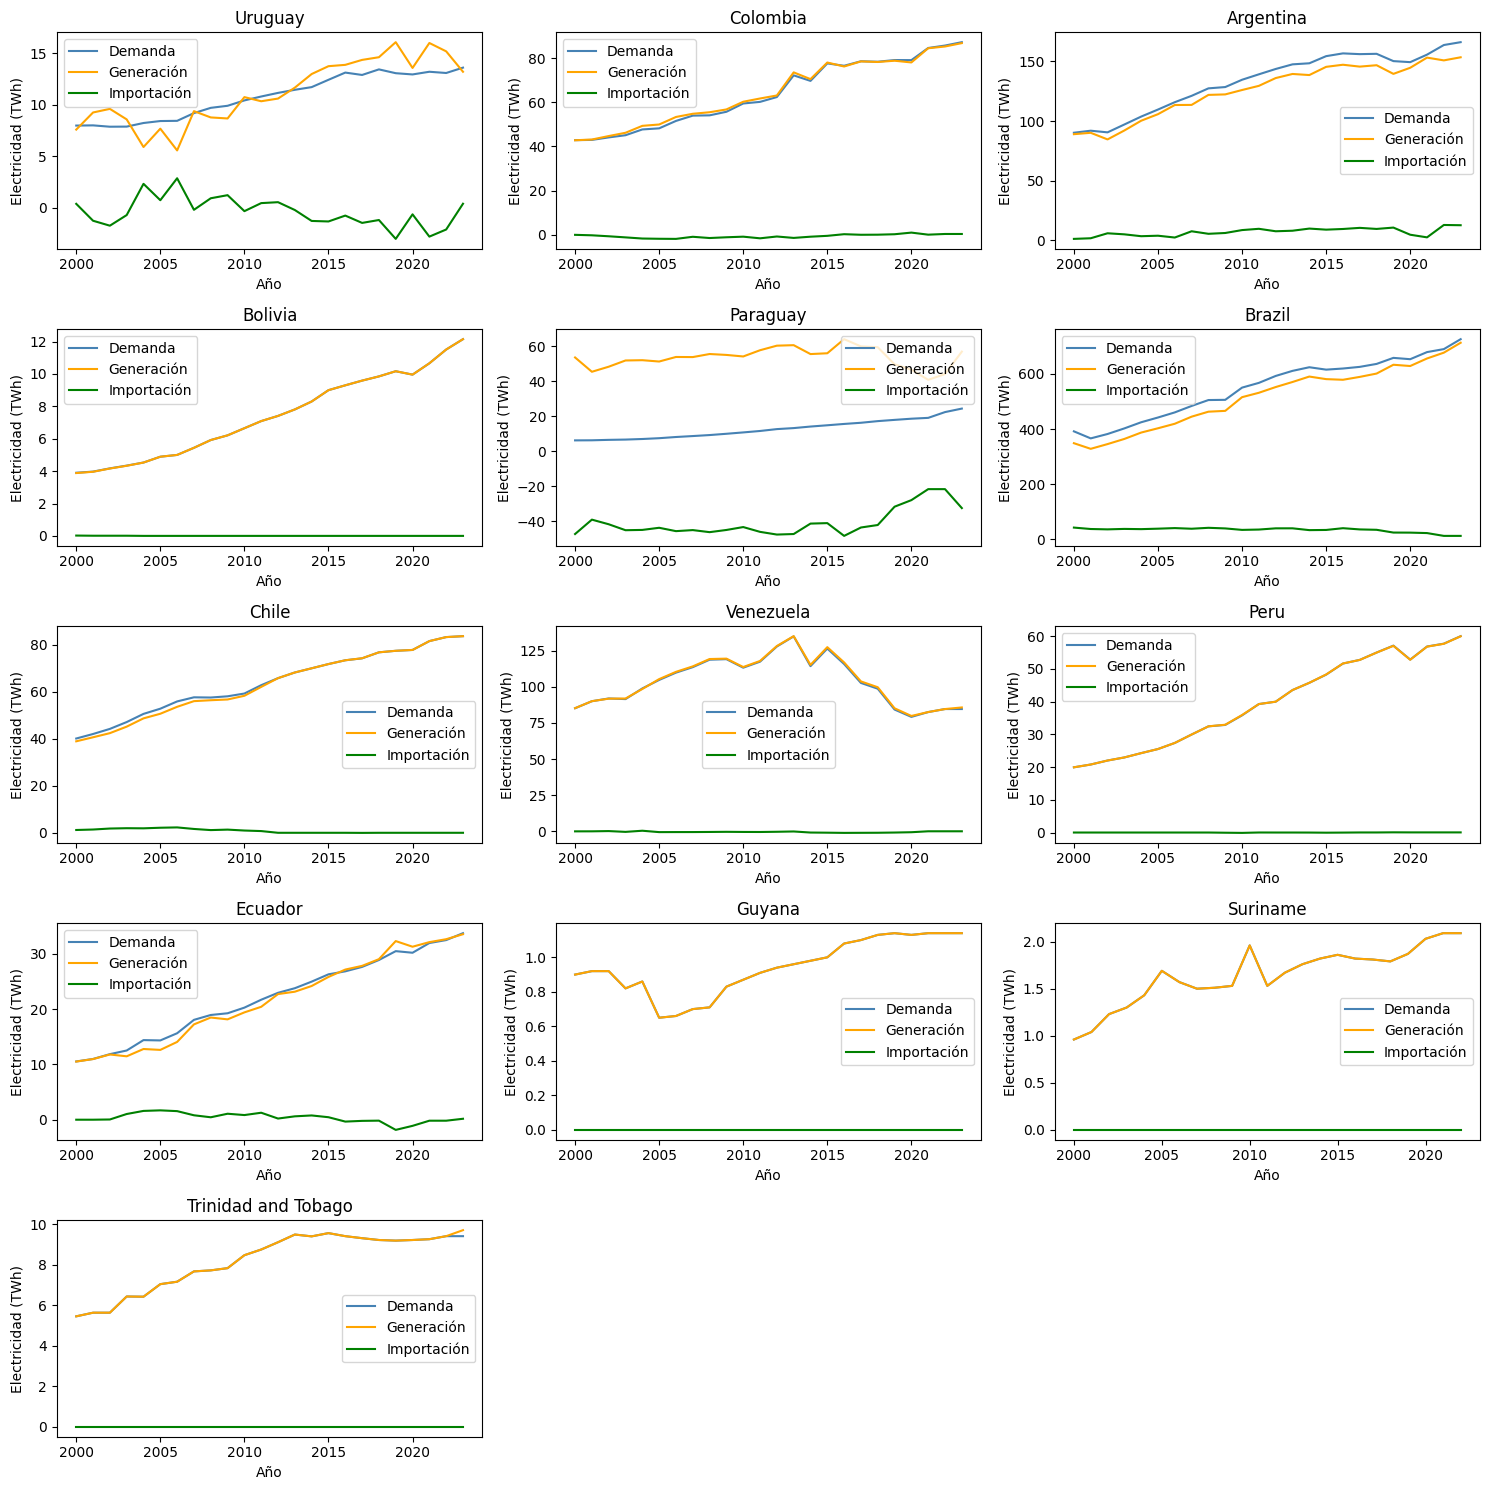

In [ ]:
# Ajustando el número de filas y columnas para la visualización de figuras
num_filas = 5
num_columnas = 3

# Creando una nueva figura y estableciendo el tamaño.
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 15))

# Crear un gráfico de líneas para cada país
for i, pais in enumerate(lista):
    # Obtener los datos de cada país
    datos_pais = df[df['Pais'] == pais]

    # Determining the subplot position.
    fila = i // num_columnas
    col = i % num_columnas

    # Plotting the electricity demand and generation as line charts on the corresponding subplot.
    sns.lineplot(x='Año', y='Demanda_elec[Twh]', data=datos_pais, ax=axes[fila, col], color='steelblue', label='Demanda')
    sns.lineplot(x='Año', y='Generacion_elec[Twh]', data=datos_pais, ax=axes[fila, col], color='orange', label='Generación')
    sns.lineplot(x='Año', y='Importaciones_netas_elec[Twh]', data=datos_pais, ax=axes[fila, col], color='green', label='Importación')

    # Setting the title for each subplot.
    axes[fila, col].set_title(pais)

    # Setting the x-axis and y-axis labels for each subplot.
    axes[fila, col].set_xlabel('Año')
    axes[fila, col].set_ylabel('Electricidad (TWh)')

    # Adding a legend to the subplot.
    axes[fila, col].legend()

# Removing the extra subplots.
for j in range(i+1, num_filas*num_columnas):
    fig.delaxes(axes.flatten()[j])

# Adjusting the spacing between subplots.
plt.tight_layout()

# Showing the plot.
plt.show()

##**Matriz de Correlación: Energía y Economía**

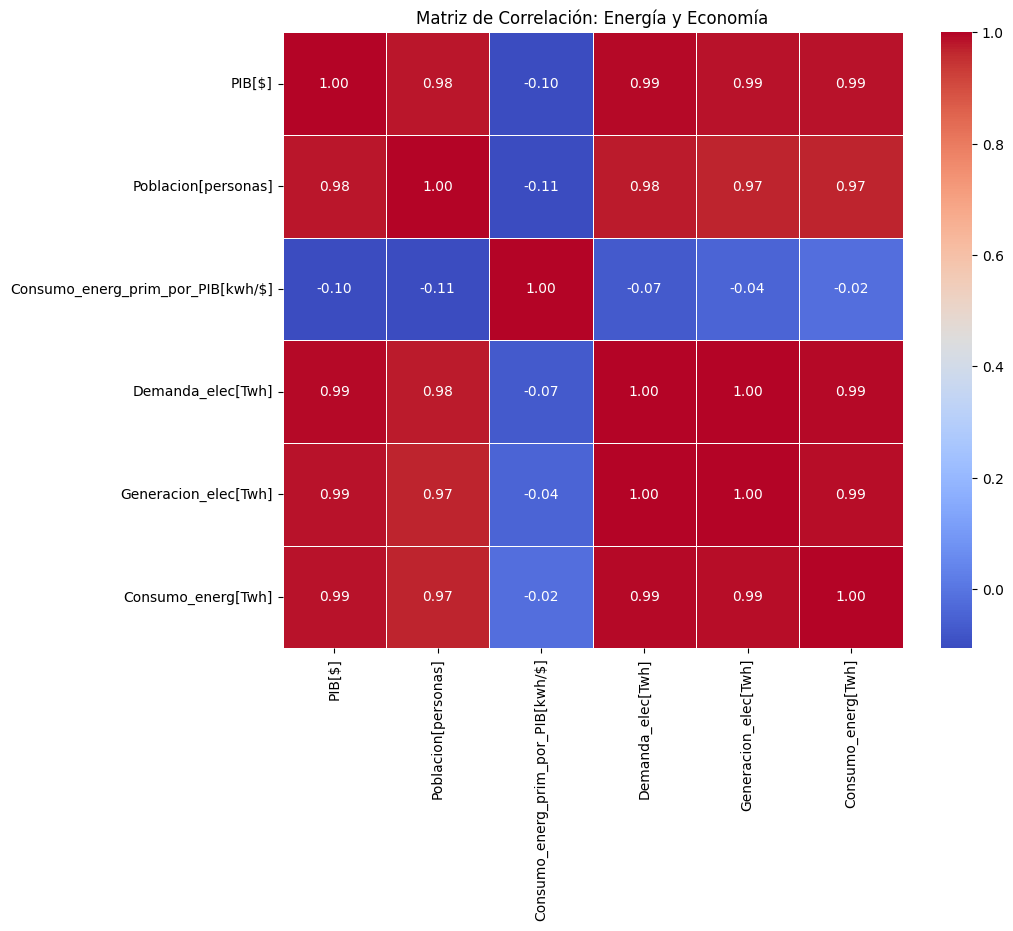

In [ ]:
# Listas de grupos de variables
grupos = {

    "Energía y Economía": [
        'PIB[$]', 'Poblacion[personas]', 'Consumo_energ_prim_por_PIB[kwh/$]', 'Demanda_elec[Twh]',
        'Generacion_elec[Twh]', 'Consumo_energ[Twh]'
    ],

}

# Generar y graficar matrices de correlación para cada grupo
for nombre, variables in grupos.items():
    df_corr = df[variables].corr()  # Filtrar variables y eliminar NaN
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
    plt.title(f'Matriz de Correlación: {nombre}')
    plt.show()

##**Demanda de Electricidad y PIB**

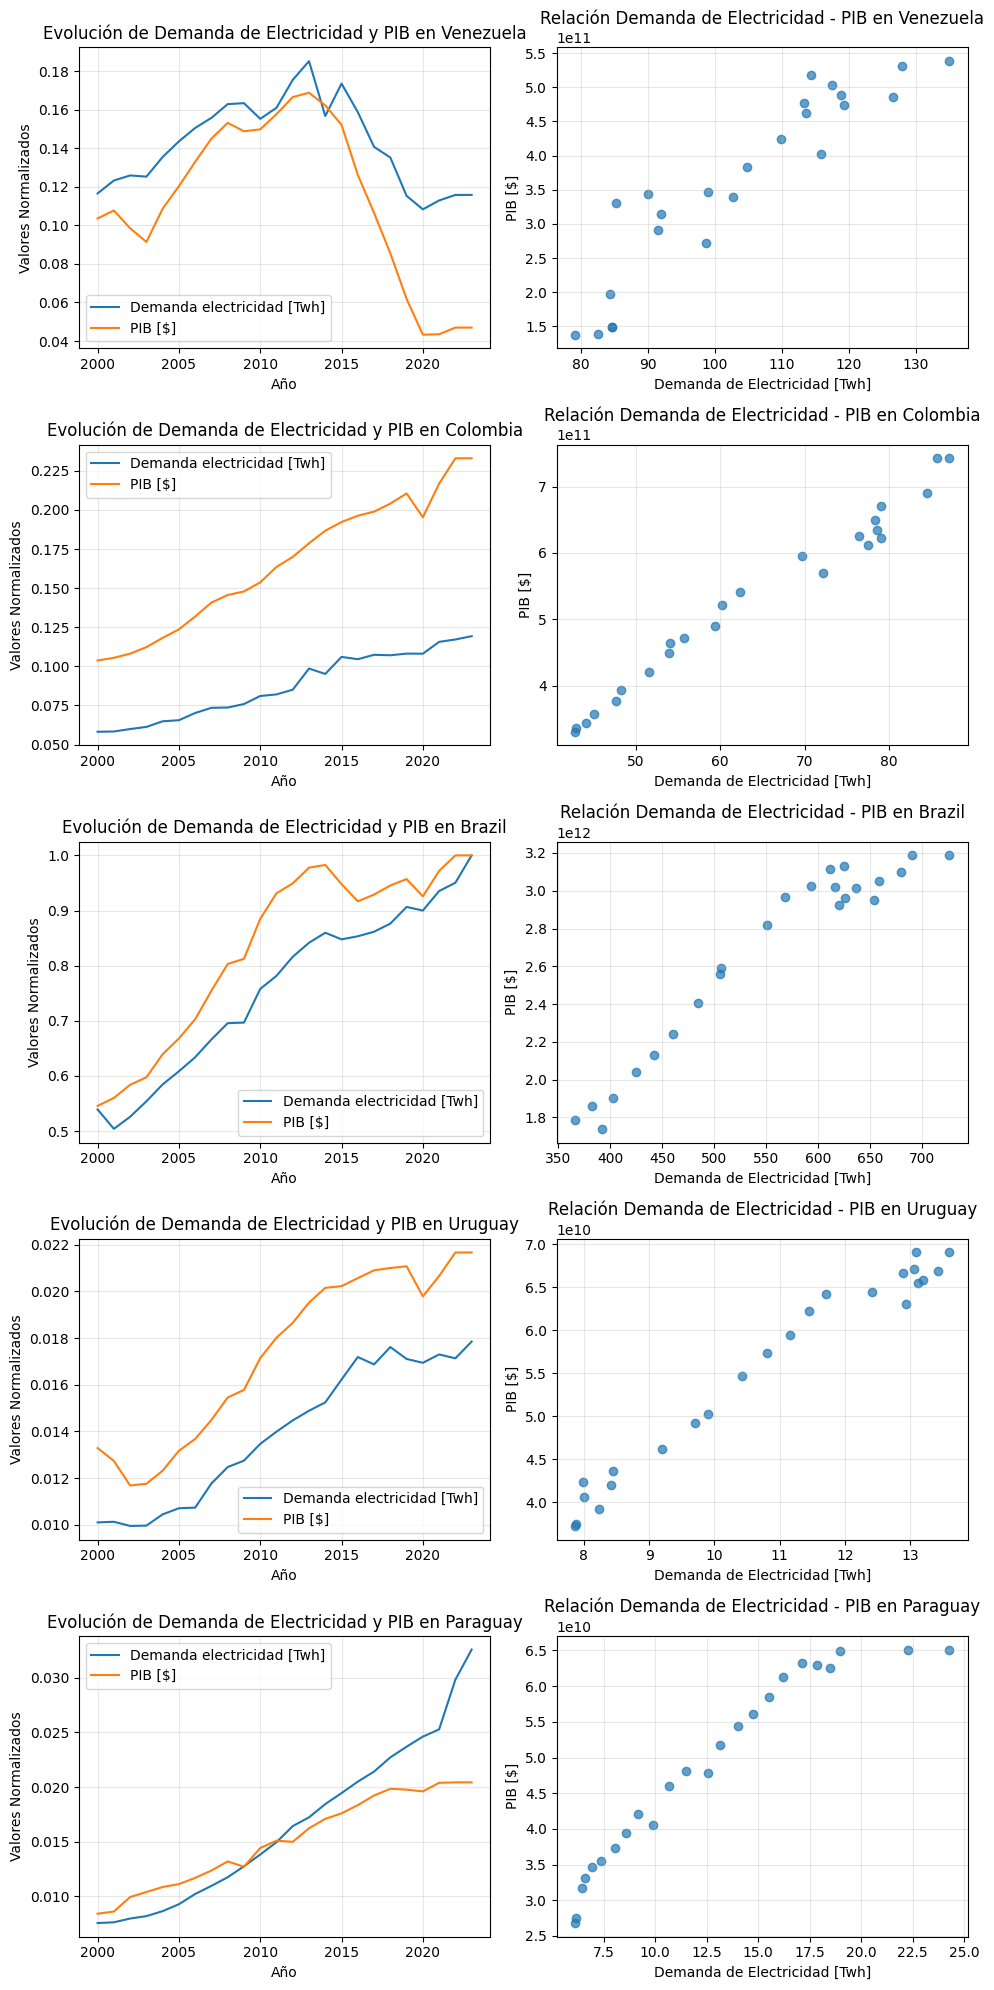

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Creamos una copia del DataFrame con las variables que vamos a trabajar
df_pib_nor = df[['Pais', 'Demanda_elec[Twh]', 'Generacion_elec[Twh]', 'PIB[$]']].copy()

# Crear un scaler
scaler = MinMaxScaler()

# Normalizar las columnas numéricas
df_pib_nor[['Demanda_elec[Twh]', 'Generacion_elec[Twh]', 'PIB[$]']] = scaler.fit_transform(df_pib_nor[['Demanda_elec[Twh]', 'Generacion_elec[Twh]', 'PIB[$]']])

#Seleccionamos los países con los que vamos a trabajar
paises_interes = ['Venezuela', 'Colombia', 'Brazil', 'Uruguay', 'Paraguay']
df_pib_nor = df_pib_nor[df_pib_nor['Pais'].isin(paises_interes)]

# Ajustando el número de filas y columnas para la visualización de figuras
num_filas = len(paises_interes)
num_columnas = 2

# Creando una nueva figura y estableciendo el tamaño.
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(10, 4 * num_filas))

# Crear un gráfico de líneas para cada país
for i, pais in enumerate(paises_interes):
    # Obtener los datos de cada país
    datos_pais = df_pib_nor[df_pib_nor['Pais'] == pais]
    datos_sinNormal = df[df['Pais'] == pais]

    # Graficar la serie de datos en el tiempo
    sns.lineplot(x='Año', y='Demanda_elec[Twh]', data=datos_pais, ax=axes[i, 0], label='Demanda electricidad [Twh]')
    sns.lineplot(x='Año', y='PIB[$]', data=datos_pais, ax=axes[i, 0], label='PIB [$]')

    axes[i, 0].set_xlabel('Año')
    axes[i, 0].set_ylabel('Valores Normalizados')
    axes[i, 0].set_title(f'Evolución de Demanda de Electricidad y PIB en {pais}')
    axes[i, 0].legend()
    axes[i, 0].grid(True, alpha=0.3)

    # Gráfico de dispersión de Demanda vs PIB
    axes[i, 1].scatter(datos_sinNormal['Demanda_elec[Twh]'], datos_sinNormal['PIB[$]'], alpha=0.7)

    axes[i, 1].set_xlabel('Demanda de Electricidad [Twh]')
    axes[i, 1].set_ylabel('PIB [$]')
    axes[i, 1].set_title(f'Relación Demanda de Electricidad - PIB en {pais}')
    axes[i, 1].grid(True, alpha=0.3)

# Adjusting the spacing between subplots.
plt.tight_layout()

# Showing the plot.
plt.show()


# **2. FUENTES DE ENERGÍA RENOVABLES EN LA GENERACIÓN DE ELECTRIDAD**

##**Energías fósiles vs renovables en la generación de electricidad**

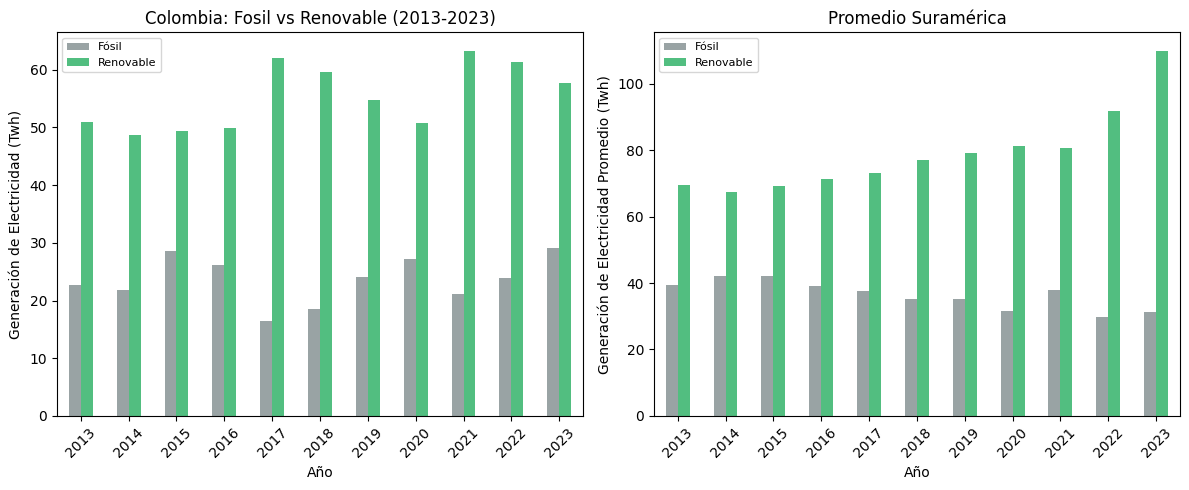

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar las columnas de interés
fuentes_energia = ['Generacion_elec_fosil[Twh]', 'Generacion_elec_renov[Twh]']

# Filtrar los datos para Colombia (2013-2023)
df_colombia = df.loc[
    (df['Pais'] == 'Colombia') &
    (df.index >= 2013) &
    (df.index <= 2023),
    fuentes_energia
]

# Filtrar los datos para los países excluyendo "Colombia", "Surinam" y "Guyana"
df_excluyendo = df.loc[
    (~df['Pais'].isin(['Colombia', 'Surinam', 'Guyana', 'Trinidad and Tobago', 'Paraguay', 'Urugay'])) &
    (df.index >= 2013) &
    (df.index <= 2023),
    fuentes_energia
]

# Calcular el promedio de los países excluyendo los tres mencionados
df_promedio = df_excluyendo.groupby(df_excluyendo.index).mean()

# Crear una figura con 2 subgráficas (una fila, dos columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graficar para Colombia
df_colombia.plot(kind='bar', ax=axes[0], color=['#99a3a4', '#52be80'])
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Generación de Electricidad (Twh)')
axes[0].set_title('Colombia: Fosil vs Renovable (2013-2023)')
axes[0].legend(['Fósil', 'Renovable'], fontsize=8)  # Renombrar leyenda
axes[0].tick_params(axis='x', rotation=45)

# Graficar para el promedio de los países excluyendo "Colombia", "Surinam" y "Guyana"
df_promedio.plot(kind='bar', ax=axes[1], color=['#99a3a4', '#52be80'])
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Generación de Electricidad Promedio (Twh)')
axes[1].set_title('Promedio Suramérica')
axes[1].legend(['Fósil', 'Renovable'], fontsize=8)  # Renombrar leyenda
axes[1].tick_params(axis='x', rotation=45)

# Ajustar el espacio entre las gráficas
plt.subplots_adjust(wspace=0.4)  # Ajustar el espacio horizontal entre las subgráfica

# Ajustar el diseño para evitar superposición de etiquetas
plt.tight_layout()

# Mostrar las gráficas
plt.show()


##**Variación en las fuentes de energía**

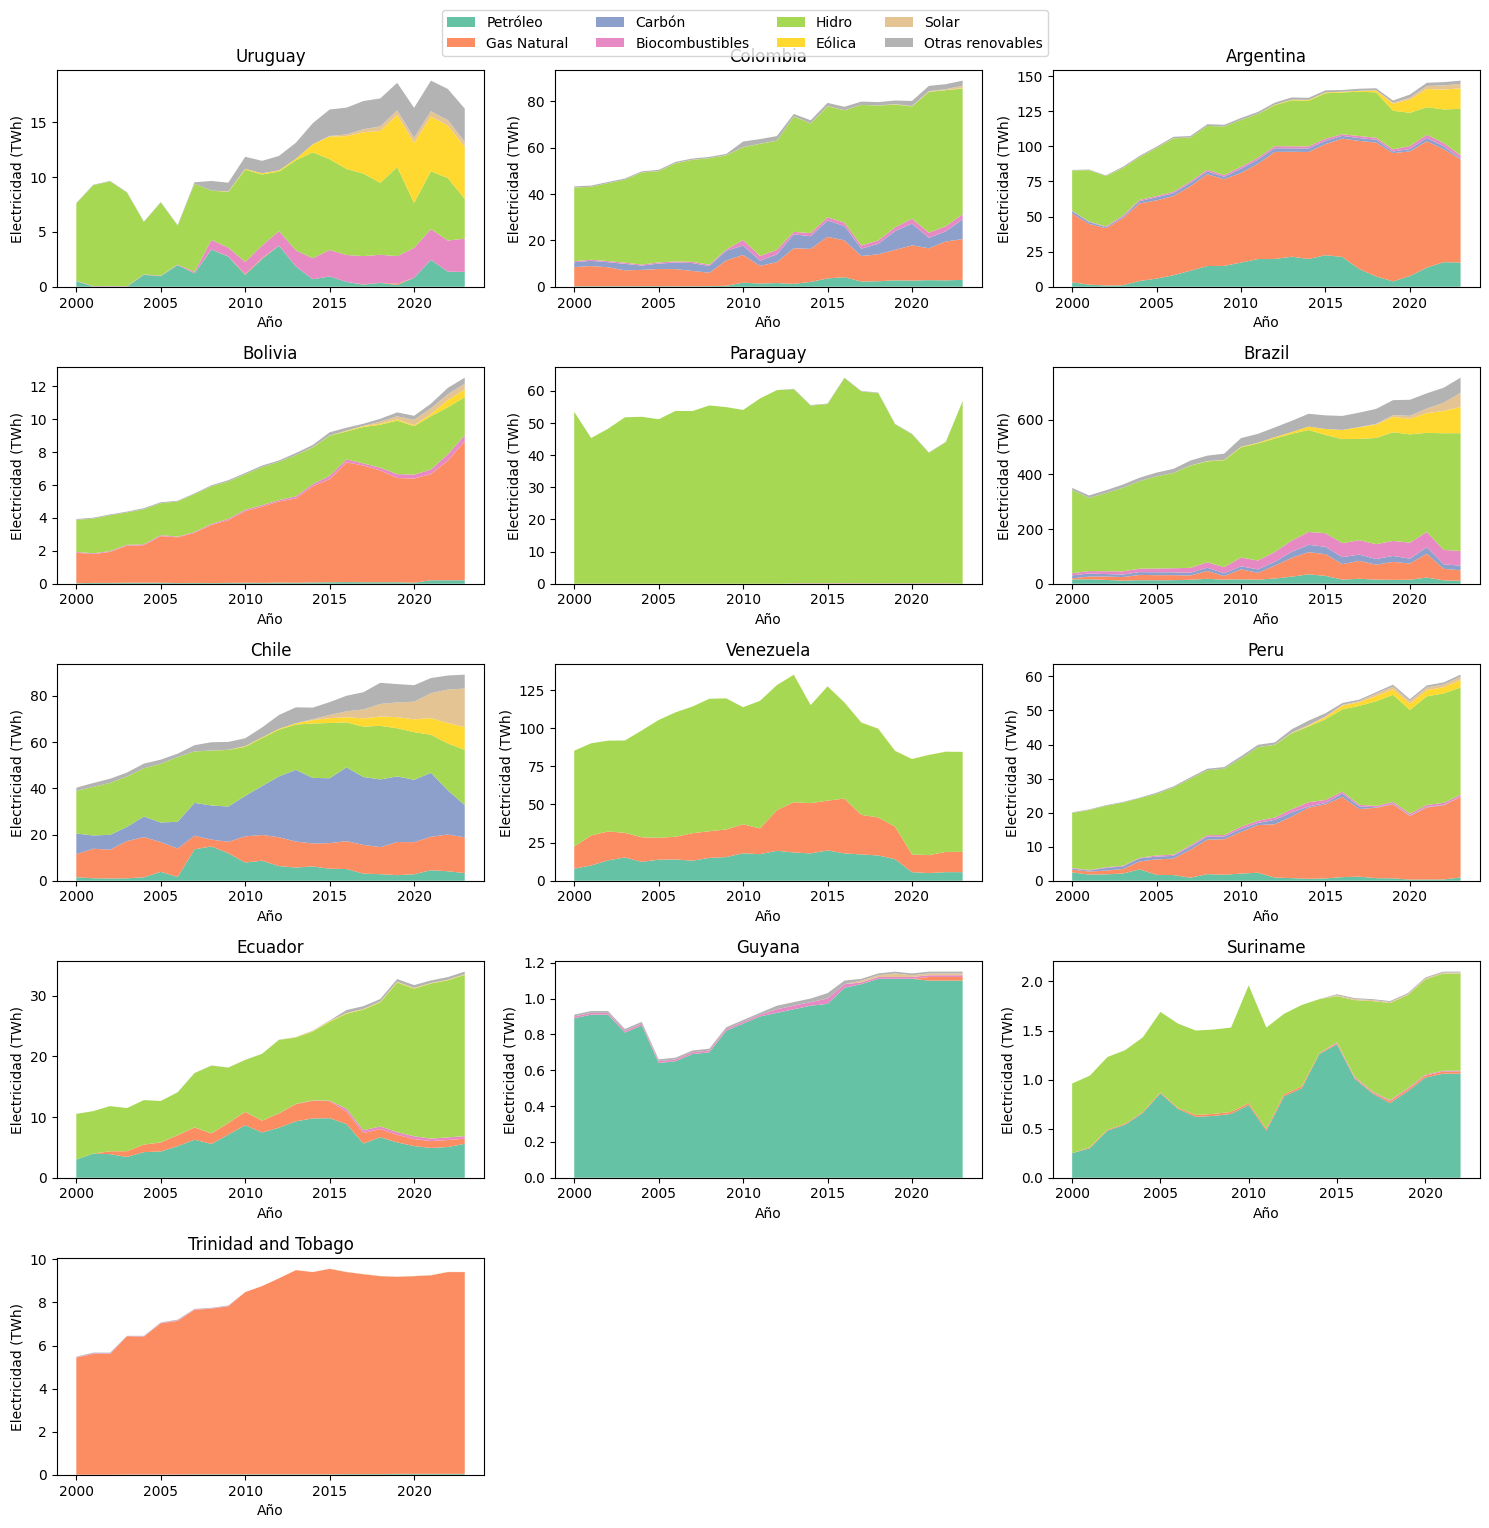

In [ ]:
# Ajustando el número de filas y columnas para la visualización de figuras
num_filas = 5
num_columnas = 3

# Creando una nueva figura y estableciendo el tamaño.
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 15))

# Seleccionamos las columnas de generación de electricidad de los diferentes tipos de energía
fuentes_energias = ['Generacion_elec_petr[Twh]','Generacion_elec_gas[Twh]','Generacion_elec_carb[Twh]','Generacion_elec_biocomb[Twh]','Generacion_elec_hidro[Twh]','Generacion_elec_eolic[Twh]','Generacion_elec_solar[Twh]','Generacion_elec_otras_renov[Twh]']

# Etiquetas para la leyenda
labels_leyenda = ['Petróleo', 'Gas Natural', 'Carbón', 'Biocombustibles', 'Hidro', 'Eólica', 'Solar', 'Otras renovables']

# Colores personalizados (opcional, usa la paleta de matplotlib si no se define)
colores = plt.cm.Set2(range(len(fuentes_energias)))

# Crear un gráfico de áreas apiladas (stackplot) para cada país
handles = None  # Para almacenar los colores y crear la leyenda global

# Crear un gráfico de líneas para cada país
for i, pais in enumerate(lista):
    # Obtener los datos de cada país
    datos_pais = df[df['Pais'] == pais]

    # Determinar la posición del subplot
    fila = i // num_columnas
    col = i % num_columnas

    # Crear gráfico de áreas apiladas
    stack = axes[fila, col].stackplot(datos_pais.index, [datos_pais[col] for col in fuentes_energias], labels=labels_leyenda, colors=colores)

    # Guardar los handles para la leyenda (una sola vez en el primer gráfico)
    if handles is None:
        handles = stack

    # Configuración del subplot
    axes[fila, col].set_title(pais)
    axes[fila, col].set_xlabel('Año')
    axes[fila, col].set_ylabel('Electricidad (TWh)')

# Agregar una única leyenda en la figura principal
fig.legend(handles, labels_leyenda, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=4)

# Eliminar subgráficos vacíos si hay menos países que espacios en la cuadrícula
for j in range(i+1, num_filas*num_columnas):
    fig.delaxes(axes.flatten()[j])

# Ajustar el diseño de la figura
plt.tight_layout()

# Mostrar la gráfica
plt.show()

##**Porcentaje de participación de la fuente de energía**

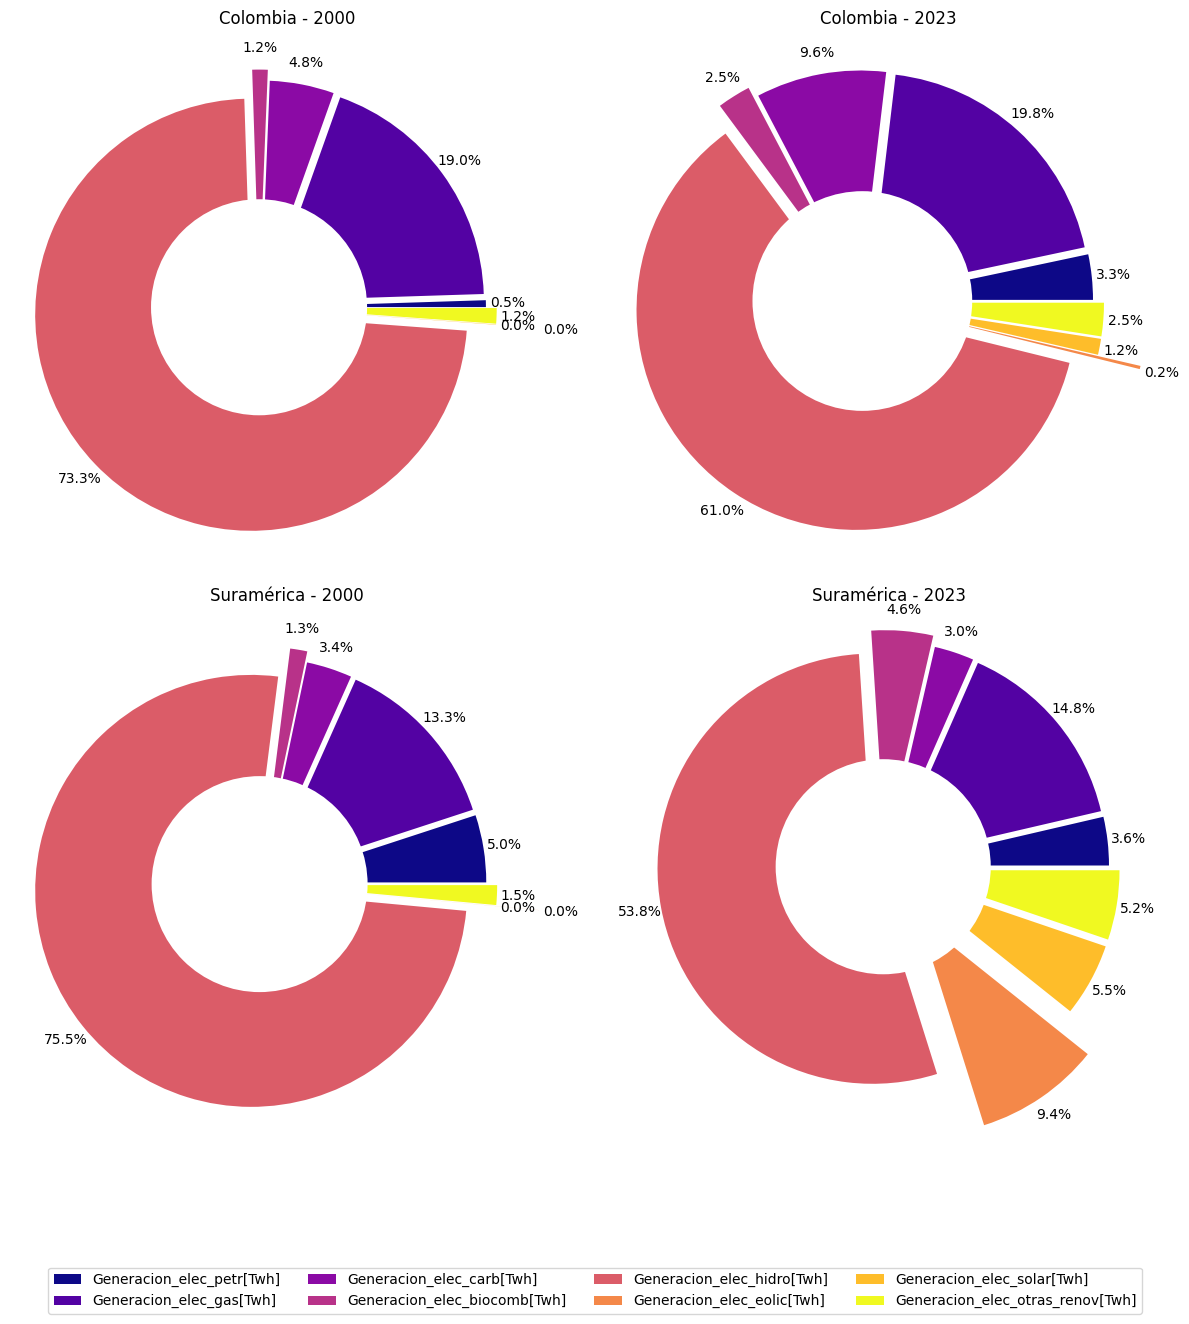

In [ ]:
# Filtrar los años de interés en el DataFrame
años_selecc = df[df.index.isin([2000, 2023])]

# Datos para Colombia
Colombia = años_selecc[años_selecc['Pais'] == 'Colombia']

# Promedio de Suramérica (sin incluir a Colombia dos veces si ya está en el dataset)
Suramerica = años_selecc[[
    'Generacion_elec_petr[Twh]', 'Generacion_elec_gas[Twh]', 'Generacion_elec_carb[Twh]',
    'Generacion_elec_biocomb[Twh]', 'Generacion_elec_hidro[Twh]', 'Generacion_elec_eolic[Twh]',
    'Generacion_elec_solar[Twh]', 'Generacion_elec_otras_renov[Twh]'
]].groupby(años_selecc.index).mean()

# Definir fuentes de energía
fuentes_energias = [
    'Generacion_elec_petr[Twh]', 'Generacion_elec_gas[Twh]', 'Generacion_elec_carb[Twh]',
    'Generacion_elec_biocomb[Twh]', 'Generacion_elec_hidro[Twh]', 'Generacion_elec_eolic[Twh]',
    'Generacion_elec_solar[Twh]', 'Generacion_elec_otras_renov[Twh]'
]

# Configuración de colores y explosión
explode = (0.05, 0.05, 0.05, 0.10, 0.05, 0.3, 0.1, 0.1)
colors = plt.cm.plasma(np.linspace(0, 1, len(fuentes_energias)))

# Crear subgráficos 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 13))

# Iterar sobre cada año seleccionado
for i, año in enumerate([2000, 2023]):
    # Extraer datos de Colombia para el año específico
    datos_Colombia = Colombia.loc[Colombia.index == año, fuentes_energias].values.flatten()

    # Extraer datos de Suramérica (ya es un promedio por año)
    datos_Suramerica = Suramerica.loc[año, fuentes_energias].values

    # **Gráfico 1 (Fila 1, Col 1): Colombia - Año 2000 / Gráfico 2 (Fila 1, Col 2): Colombia - Año 2023**
    wedges, texts, autotexts = axes[0, i].pie(
        datos_Colombia, autopct='%1.1f%%', pctdistance=1.1, explode=explode, colors=colors
    )
    axes[0, i].set_title(f'Colombia - {año}', pad=-20)
    axes[0, i].axis('equal')
    centre_circle = plt.Circle((0, 0), 0.50, fc='white')
    axes[0, i].add_artist(centre_circle)

    # **Gráfico 3 (Fila 2, Col 1): Suramérica - Año 2000 / Gráfico 4 (Fila 2, Col 2): Suramérica - Año 2023**
    wedges, texts, autotexts = axes[1, i].pie(
        datos_Suramerica, autopct='%1.1f%%', pctdistance=1.1, explode=explode, colors=colors
    )
    axes[1, i].set_title(f'Suramérica - {año}', pad=-20)
    axes[1, i].axis('equal')
    centre_circle = plt.Circle((0, 0), 0.50, fc='white')
    axes[1, i].add_artist(centre_circle)

    # Guardar wedges para la leyenda
    if i == 0:
        wedges_total = wedges

# Agregar la leyenda general en la parte inferior
fig.legend(wedges_total, fuentes_energias, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.02))

# Ajustar el espacio entre los gráficos
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Mostrar los gráficos
plt.show()


#**3. FUENTES DE ENERGÍAS RENOVABLES EN EL CONSUMO DE ENERGÍA**

##**Consumo de energía primaria**

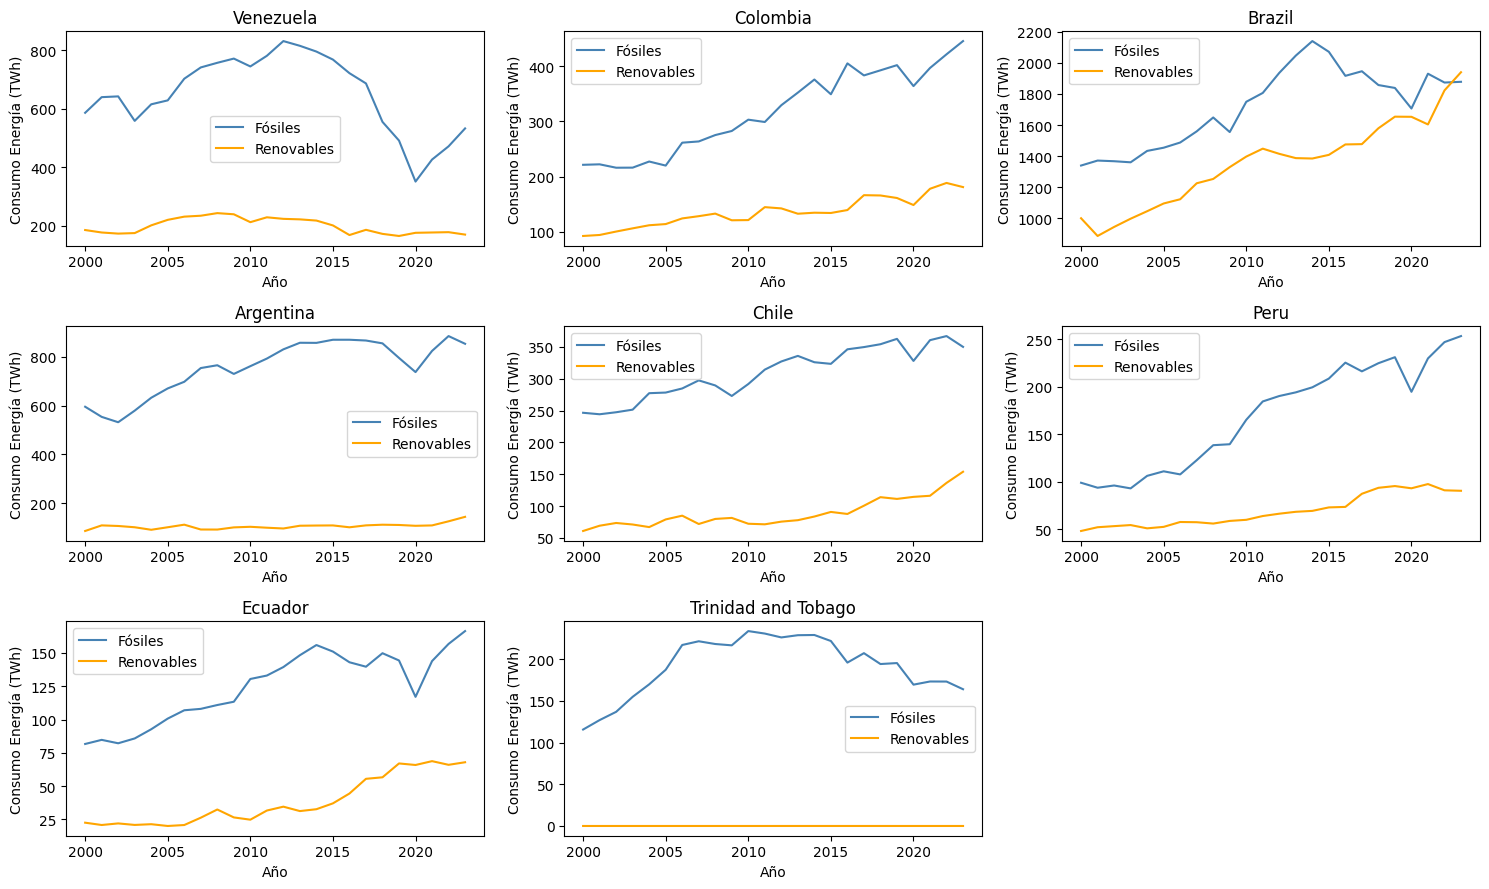

In [ ]:
# Ajustando el número de filas y columnas para la visualización de figuras
num_filas = 3
num_columnas = 3

# Creando una nueva figura y estableciendo el tamaño.
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 9))

paises_interes = ['Venezuela', 'Colombia', 'Brazil', 'Argentina', 'Chile', 'Peru', 'Ecuador', 'Trinidad and Tobago']

# Crear un gráfico de líneas para cada país
for i, pais in enumerate(paises_interes):
    # Obtener los datos de cada país
    datos_pais = df[df['Pais'] == pais]

    # Determining the subplot position.
    fila = i // num_columnas
    col = i % num_columnas

    # Plotting the electricity demand and generation as line charts on the corresponding subplot.
    sns.lineplot(x='Año', y='Consumo_energ_fosil[Twh]', data=datos_pais, ax=axes[fila, col], color='steelblue', label='Fósiles')
    sns.lineplot(x='Año', y='Consumo_energ_renov[Twh]', data=datos_pais, ax=axes[fila, col], color='orange', label='Renovables')

    # Setting the title for each subplot.
    axes[fila, col].set_title(pais)

    # Setting the x-axis and y-axis labels for each subplot.
    axes[fila, col].set_xlabel('Año')
    axes[fila, col].set_ylabel('Consumo Energía (TWh)')

    # Adding a legend to the subplot.
    axes[fila, col].legend()

# Removing the extra subplots.
for j in range(i+1, num_filas*num_columnas):
    fig.delaxes(axes.flatten()[j])

# Adjusting the spacing between subplots.
plt.tight_layout()

# Showing the plot.
plt.show()

##**Distribución de consumo de energía**

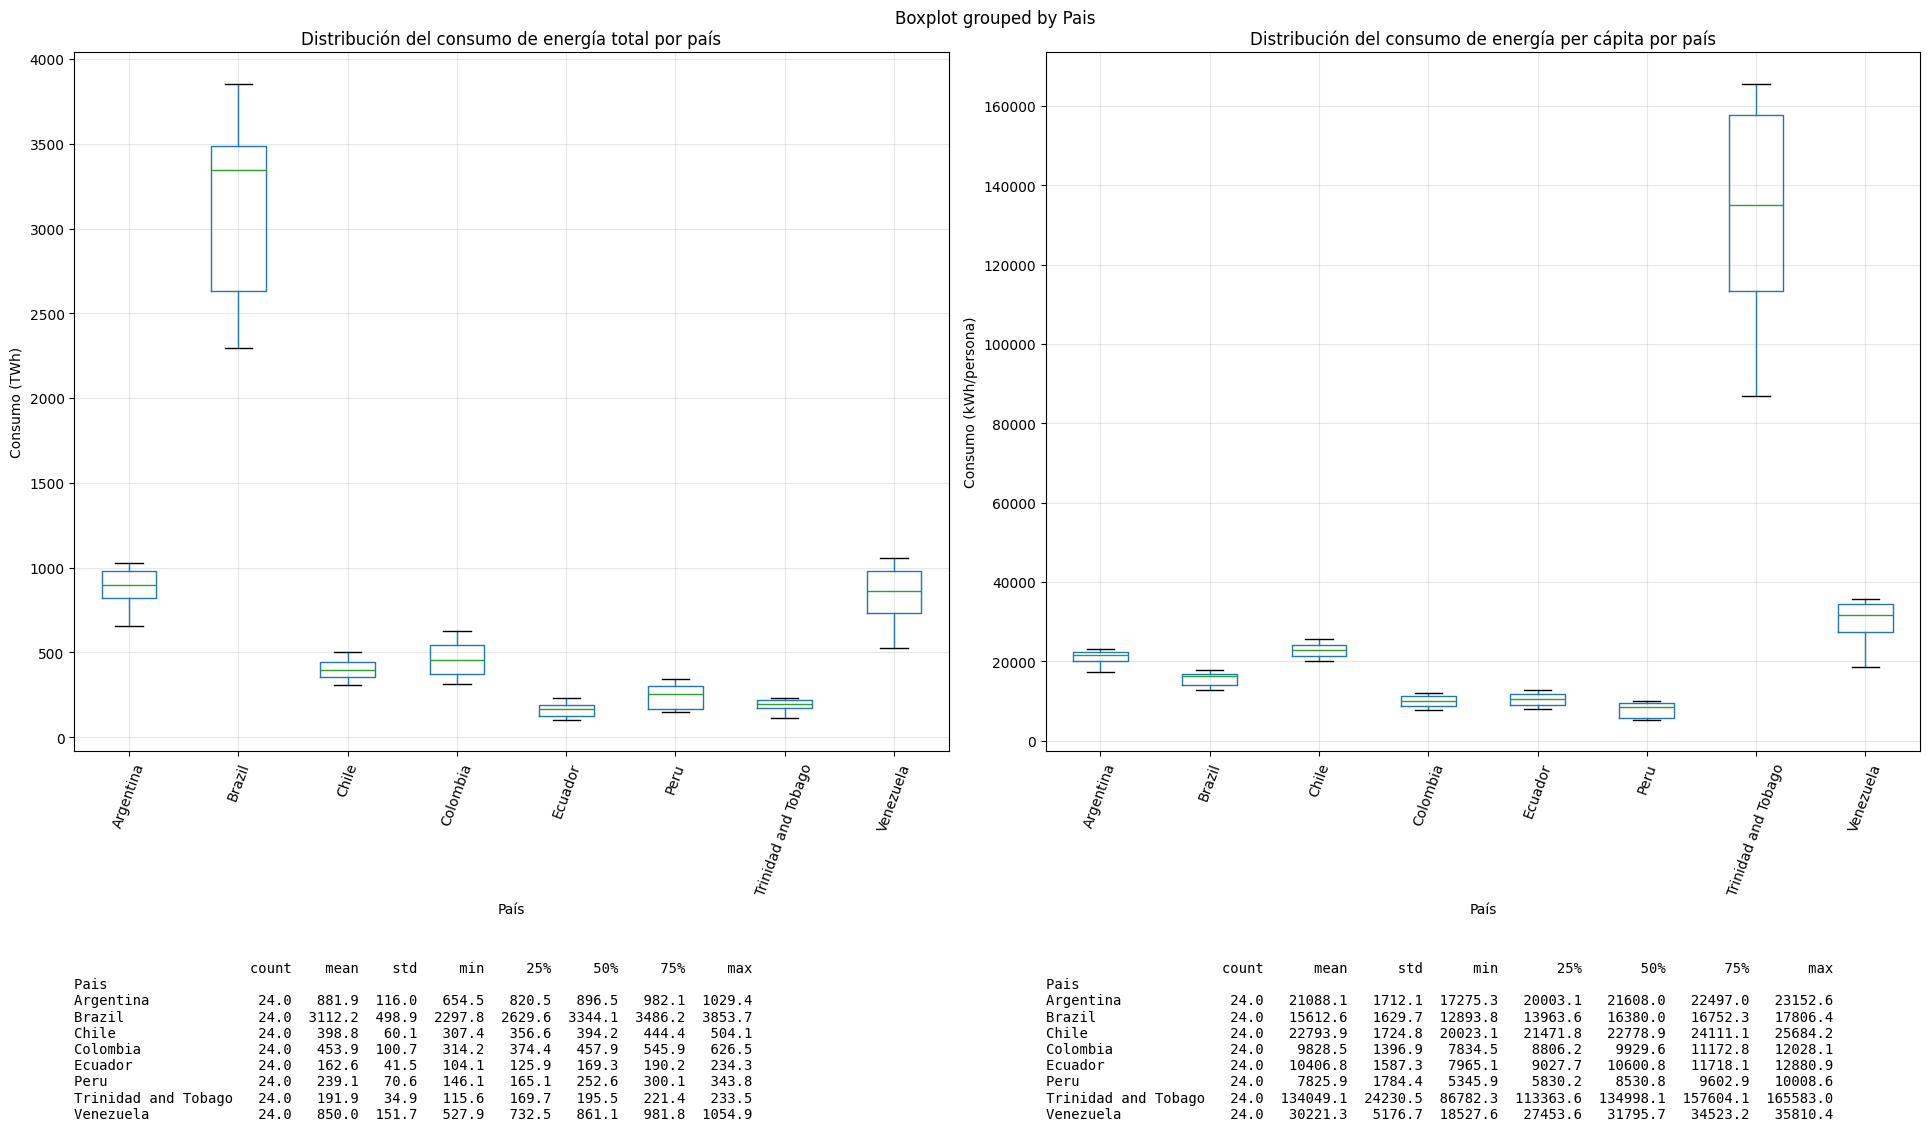

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar los datos para los países de interés
paises_interes = ['Venezuela', 'Colombia', 'Brazil', 'Argentina', 'Chile', 'Peru', 'Ecuador', 'Trinidad and Tobago']

df_capita = df[df['Pais'].isin(paises_interes)].dropna(subset=['Energía_per_capita[kwh/persona]'])[['Pais', 'Energía_per_capita[kwh/persona]']]
df_filtrado = df[df['Pais'].isin(paises_interes)].dropna(subset=['Consumo_energ[Twh]'])[['Pais', 'Consumo_energ[Twh]']]

# Crear la figura con 2 subgráficos en una fila
fig, axes = plt.subplots(1, 2, figsize=(20, 14))

# Gráfico de consumo total
df_filtrado.boxplot(column='Consumo_energ[Twh]', by='Pais', grid=False, ax=axes[0])
axes[0].set_title('Distribución del consumo de energía total por país')
axes[0].set_ylabel('Consumo (TWh)')
axes[0].set_xlabel('País')
axes[0].tick_params(axis='x', rotation=70)
axes[0].grid(True, alpha=0.3)

# Análisis estadístico del consumo total
stats_total = df_filtrado.groupby('Pais')['Consumo_energ[Twh]'].describe().round(1).to_string()
axes[0].text(0, -0.3, stats_total, fontsize=10, va='top', family='monospace', transform=axes[0].transAxes)

# Gráfico de consumo per cápita
df_capita.boxplot(column='Energía_per_capita[kwh/persona]', by='Pais', grid=False, ax=axes[1])
axes[1].set_title('Distribución del consumo de energía per cápita por país')
axes[1].set_ylabel('Consumo (kWh/persona)')
axes[1].set_xlabel('País')
axes[1].tick_params(axis='x', rotation=70)
axes[1].grid(True, alpha=0.3)

# Análisis estadístico del consumo per cápita
stats_capita = df_capita.groupby('Pais')['Energía_per_capita[kwh/persona]'].describe().round(1).to_string()
axes[1].text(0, -0.3, stats_capita, fontsize=10, va='top', family='monospace', transform=axes[1].transAxes)

# Ajustar espacio entre subgráficos
fig.tight_layout(rect=[0, 0.1, 1, 1])

plt.show()



# #**4. EMISIONES GEI EN LA GENERACIÓN DE ENERGÍA ELÉCTRICA**

##**Matriz de correlación de emisiones**

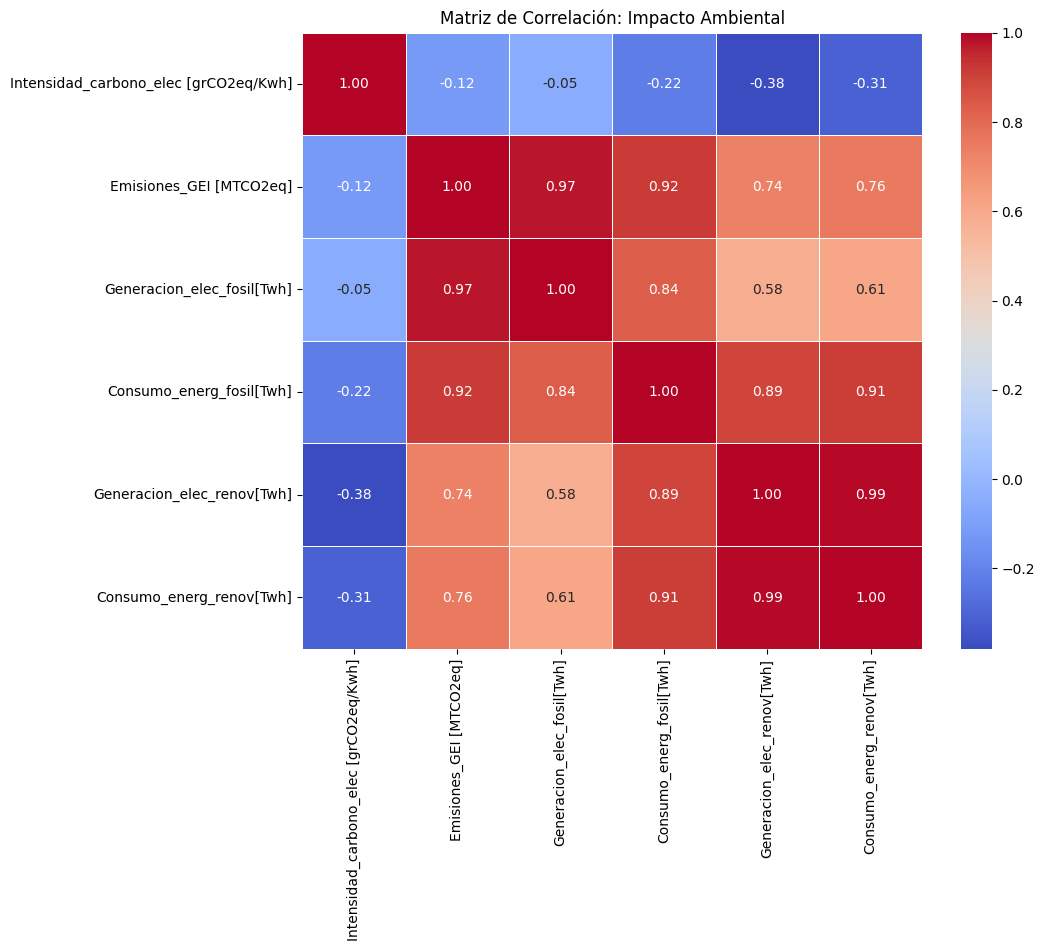

In [ ]:
# Listas de grupos de variables
grupos = {

    "Impacto Ambiental": [
        'Intensidad_carbono_elec [grCO2eq/Kwh]', 'Emisiones_GEI [MTCO2eq]',
        'Generacion_elec_fosil[Twh]', 'Consumo_energ_fosil[Twh]',
        'Generacion_elec_renov[Twh]', 'Consumo_energ_renov[Twh]'
    ]
}

# Generar y graficar matrices de correlación para cada grupo
for nombre, variables in grupos.items():
    df_corr = df[variables].corr()  # Filtrar variables y eliminar NaN
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
    plt.title(f'Matriz de Correlación: {nombre}')
    plt.show()

##**Mapa de Emisiones GEI**

In [ ]:

# Cargar mapa base de Sudamérica
url_mapa = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
mapa_sudamerica = gpd.read_file(url_mapa)

# Filtrar el mapa para solo incluir Sudamérica
mapa_sudamerica = mapa_sudamerica[mapa_sudamerica["name"].isin(lista)]

# Extraer los datos del DataFrame para el año 2023
datos = {
    "country": df.loc[df.index == 2023, "Pais"].values,
    "emisiones": df.loc[df.index == 2023, "Emisiones_GEI [MTCO2eq]"].values,
    "intensidad": df.loc[df.index == 2023, "Intensidad_carbono_elec [grCO2eq/Kwh]"].values
}

# Convertir a DataFrame y unir con el mapa base
gdf = pd.DataFrame(datos)
mapa_sudamerica = mapa_sudamerica.merge(gdf, left_on="name", right_on="country")

# Mapa 1: Emisiones de GEI
fig1 = px.choropleth_mapbox(
    mapa_sudamerica,
    geojson=mapa_sudamerica.geometry,
    locations=mapa_sudamerica.index,
    color="emisiones",
    hover_name="country",
    color_continuous_scale="magenta",
    mapbox_style="carto-positron",
    zoom=2,
    center={"lat": -15, "lon": -60},
    opacity=0.8,
    title="Emisiones GEI en 2023"
)

# Mapa 2: Intensidad de carbono
fig2 = px.choropleth_mapbox(
    mapa_sudamerica,
    geojson=mapa_sudamerica.geometry,
    locations=mapa_sudamerica.index,
    color="intensidad",
    hover_name="country",
    color_continuous_scale="Blues",
    mapbox_style="carto-positron",
    zoom=2,
    center={"lat": -15, "lon": -60},
    opacity=0.8,
    title="Intensidad de Carbono en 2023"
)

# Mostrar los mapas juntos
display(fig1, fig2)


## **Conclusiones:**

La dependencia de los combustibles fósiles sigue siendo alta en muchos países, pero hay una tendencia creciente hacia la diversificación de la matriz energética y el aumento de la participación de las energías renovables.

Para el análisis de Suramérica arrojó que Brasil es el país que mas diversificación y esfuerzo ha realizado en su matriz de transición energética. En contraste Colombia aunque en su producción tiene un gran porcentaje de energía renovable (hidroeléctrica), también tiene una gran dependencia de energías fósiles (gas y petróleo) en la industria y consumo de hogares.

Desafíos:
La inversión en infraestructura energética es fundamental para satisfacer la creciente demanda y garantizar la seguridad energética.
La variabilidad climática y los eventos extremos pueden afectar la generación de energía, especialmente la hidroelectricidad, que es una fuente importante en muchos países de la región.

# **Fuentes y estádísticas:**

Enlace: https://ourworldindata.org/energy

Enlace: https://www.worldbank.org/en/topic/energy

Enlace: https://www.iea.org/



